# Cleaning and Analysing the bios

In [10]:
#Importing the necessary libraries

In [11]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [33]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#In case the 'stopwords' and 'wordnet' are not downloaded, use the above commands

In [12]:
with open("profiles.pkl",'rb') as pp:
    df = pickle.load(pp)

## Tokenization: Process of splitting up the sentences into individual tokens using NLTK

### 2 options to tokenize: Stemming and Lemmatizing
#### Here we use Lemmatizing

In [13]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
def tokenize(text):
    
   ### Tokenizing the bios, then lemmatizing them
    
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [17]:
df['Bios'] = df.Bios.apply(tokenize)

In [18]:
df

,Bios,Drinks,Perfume,Vacation,Personal Style,Music,Hobby,Food,Scent,Feel
0,"[passionate, analyst, incurable, pop, culture, practitioner, creator, total, troublemaker, subtly, charming, food, lover, bacon, nerd, writer]",7,10,5,9,7,6,11,10,8
1,"[organizer, hardcore, web, guru, certified, coffee, ninja, amateur, explorer, tv, maven, wannabe, twitter, practitioner, food, expert, gamer]",12,4,2,1,12,1,4,1,6
2,"[hipster-friendly, social, medium, scholar, professional, student, tv, junkie, pop, culture, practitioner, reader, beer, fanatic]",8,10,6,3,1,4,2,8,2
3,"[writer, introvert, beer, aficionado, music, specialist, hipster-friendly, tv, fanatic]",4,1,9,4,10,7,1,4,12
4,"[creator, unable, type, boxing, glove, general, communicator, troublemaker, alcohol, geek]",11,9,1,5,2,11,5,1,7
...,...,...,...,...,...,...,...,...,...,...
14995,"[coffee, expert, unapologetic, twitter, guru, avid, tv, scholar, internet, trailblazer, alcohol, advocate]",8,0,4,8,9,12,2,12,4
14996,"[freelance, bacon, enthusiast, infuriatingly, humble, beer, guru, web, lover, reader, amateur, tv, maven]",3,9,9,6,2,12,12,6,5
14997,"[hardcore, twitter, practitioner, extreme, web, expert, pop, culture, evangelist]",7,6,6,11,5,2,11,0,11
14998,"[hardcore, tv, guru, troublemaker, typical, food, lover, beer, expert, entrepreneur, analyst, extreme, creator]",8,7,7,1,11,8,1,8,3


## Checking for the most common words

In [19]:
total_words = set() #Using set in order to count only unique words

for bio in df['Bios']:
    total_words.update(bio)
        
print("Number of unique words: ",len(total_words))

Number of unique words:  104


#### Determining the most common words out of the 104 unique words

In [20]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 5214),
 ('web', 4212),
 ('internet', 3874),
 ('beer', 3855),
 ('twitter', 3852),
 ('zombie', 3764),
 ('bacon', 3676),
 ('tv', 3670),
 ('coffee', 3552),
 ('food', 3476),
 ('alcohol', 3466),
 ('travel', 3284),
 ('pop', 3267),
 ('social', 3216),
 ('culture', 3162),
 ('music', 2965),
 ('medium', 2908),
 ('advocate', 2848),
 ('lover', 2774),
 ('guru', 2753),
 ('aficionado', 2726),
 ('geek', 2685),
 ('evangelist', 2650),
 ('ninja', 2580),
 ('fan', 2568),
 ('enthusiast', 2528),
 ('trailblazer', 2387),
 ('specialist', 2337),
 ('expert', 2314),
 ('buff', 2303),
 ('scholar', 2263),
 ('nerd', 2241),
 ('organizer', 2218),
 ('junkie', 2218),
 ('practitioner', 2211),
 ('maven', 2116),
 ('communicator', 2082),
 ('entrepreneur', 2034),
 ('thinker', 1941),
 ('professional', 1888),
 ('devoted', 1886),
 ('analyst', 1876),
 ('problem', 1857),
 ('solver', 1857),
 ('writer', 1822),
 ('troublemaker', 1816),
 ('general', 1806),
 ('typical', 1800),
 ('gamer', 1772),
 ('infuriatingly', 1761),
 ('hu

### Visualizing the obtained word count results

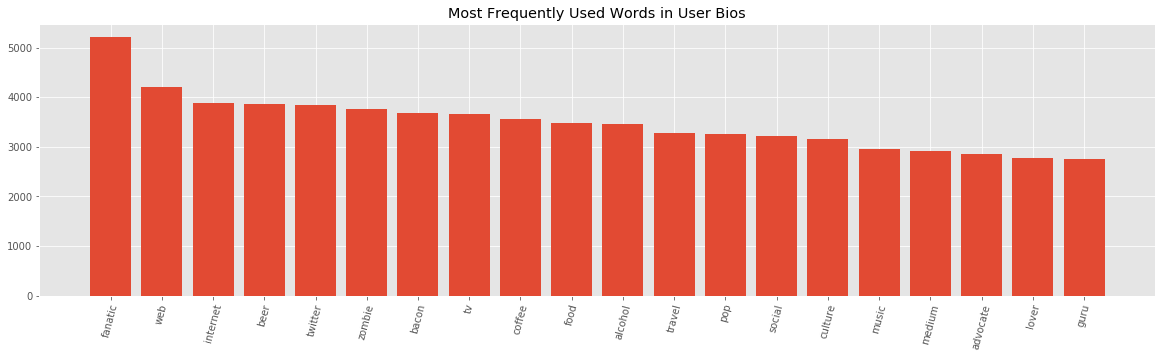

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))

plt.bar(*zip(*bio_freq.most_common(20)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

The results tells us that:
Fanatic(5214) is the most widely used which is an adjective.
The next most frequently occuring words are all nouns such as 'web', 'internet','beer', etc.,
Therefore it appears that the word fanatic usually comes in pairs with the nouns.
So we use bigrams to get a better understanding of the most common words in the bios.

### Lexical Analysis using Bigrams
#### Bigram is a pair of words.

In [22]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

In [24]:
# Top 30 most common bigrams
bio_scored[:30]

[(('pop', 'culture'), 0.01712874183378295),
 (('social', 'medium'), 0.0157528087453007),
 (('problem', 'solver'), 0.010059479312250139),
 (('infuriatingly', 'humble'), 0.00953944160951669),
 (('subtly', 'charming'), 0.007524295511424578),
 (('boxing', 'glove'), 0.00402487513678075),
 (('type', 'boxing'), 0.00402487513678075),
 (('unable', 'type'), 0.00402487513678075),
 (('fall', 'lot'), 0.0035319227310646687),
 (('twitter', 'fanatic'), 0.0030498044441555345),
 (('food', 'fanatic'), 0.0027410320581575495),
 (('future', 'teen'), 0.002681444404719342),
 (('teen', 'idol'), 0.002681444404719342),
 (('alcohol', 'fanatic'), 0.0023726720187213575),
 (('animal', 'everywhere'), 0.002367254959317884),
 (('friend', 'animal'), 0.002367254959317884),
 (('fit', 'apathy'), 0.0022968331870727296),
 (('prone', 'fit'), 0.0022968331870727296),
 (('travel', 'fanatic'), 0.0022589137712484154),
 (('beer', 'fanatic'), 0.0022480796524414685),
 (('culture', 'fanatic'), 0.002215577296020628),
 (('web', 'enthusi

### Plotting the bigram data

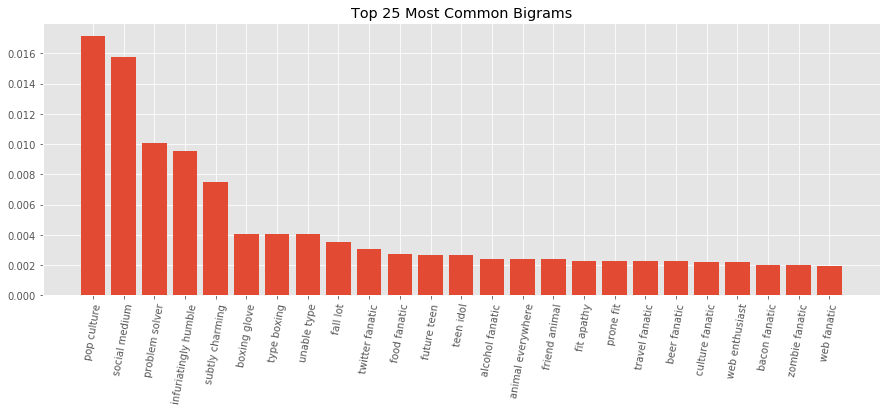

In [26]:
# Creating a list of the bigrams
bigrams = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:30]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:30]))

# Combining both the scores and the bigrams
bigrams_final = list(zip(bigrams, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams_final[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [27]:
# Filtering out bigrams based on frequency of occurence
bio_finder.apply_freq_filter(20)

# Calculating the pointwise mutual information score, which determines how often these words are associated with each other
bio_pmi = bio_finder.score_ngrams(bigram_meas.pmi)

In [28]:
bio_pmi

[(('fit', 'apathy'), 8.766138203271446),
 (('prone', 'fit'), 8.766138203271446),
 (('animal', 'everywhere'), 8.722569188334045),
 (('friend', 'animal'), 8.722569188334045),
 (('future', 'teen'), 8.542773942867676),
 (('teen', 'idol'), 8.542773942867676),
 (('fall', 'lot'), 8.145330503603564),
 (('boxing', 'glove'), 7.956840257296051),
 (('type', 'boxing'), 7.956840257296051),
 (('unable', 'type'), 7.956840257296051),
 (('subtly', 'charming'), 7.054227773853249),
 (('lot', 'tvaholic'), 6.964758257961748),
 (('infuriatingly', 'humble'), 6.711879464003438),
 (('problem', 'solver'), 6.635300557899225),
 (('travelaholic', 'prone'), 6.062702232670432),
 (('tvaholic', 'gamer'), 5.863360441472874),
 (('social', 'mediaholic'), 5.843006966655718),
 (('social', 'medium'), 5.843006966655718),
 (('pop', 'cultureaholic'), 5.820307918396583),
 (('pop', 'culture'), 5.82030791839658),
 (('idol', 'webaholic'), 5.680764945939998),
 (('tvaholic', 'extreme'), 5.573705802419568),
 (('practitioner', 'tvaholi

## Incorporating the bigrams into the bio dataframe

In [29]:
# Creating bigrams for each pair of words in the bios
df['Bigrams'] = df.Bios.apply(lambda bio: BigramCollocationFinder.from_words(bio).nbest(bigram_meas.pmi, 100))

In [31]:
df[['Bios','Bigrams']]

,Bios,Bigrams
0,"[passionate, analyst, incurable, pop, culture, practitioner, creator, total, troublemaker, subtly, charming, food, lover, bacon, nerd, writer]","[(analyst, incurable), (bacon, nerd), (charming, food), (creator, total), (culture, practitioner), (food, lover), (incurable, pop), (lover, bacon), (nerd, writer), (passionate, analyst), (pop, culture), (practitioner, creator), (subtly, charming), (total, troublemaker), (troublemaker, subtly)]"
1,"[organizer, hardcore, web, guru, certified, coffee, ninja, amateur, explorer, tv, maven, wannabe, twitter, practitioner, food, expert, gamer]","[(amateur, explorer), (certified, coffee), (coffee, ninja), (expert, gamer), (explorer, tv), (food, expert), (guru, certified), (hardcore, web), (maven, wannabe), (ninja, amateur), (organizer, hardcore), (practitioner, food), (tv, maven), (twitter, practitioner), (wannabe, twitter), (web, guru)]"
2,"[hipster-friendly, social, medium, scholar, professional, student, tv, junkie, pop, culture, practitioner, reader, beer, fanatic]","[(beer, fanatic), (culture, practitioner), (hipster-friendly, social), (junkie, pop), (medium, scholar), (pop, culture), (practitioner, reader), (professional, student), (reader, beer), (scholar, professional), (social, medium), (student, tv), (tv, junkie)]"
3,"[writer, introvert, beer, aficionado, music, specialist, hipster-friendly, tv, fanatic]","[(aficionado, music), (beer, aficionado), (hipster-friendly, tv), (introvert, beer), (music, specialist), (specialist, hipster-friendly), (tv, fanatic), (writer, introvert)]"
4,"[creator, unable, type, boxing, glove, general, communicator, troublemaker, alcohol, geek]","[(alcohol, geek), (boxing, glove), (communicator, troublemaker), (creator, unable), (general, communicator), (glove, general), (troublemaker, alcohol), (type, boxing), (unable, type)]"
...,...,...
14995,"[coffee, expert, unapologetic, twitter, guru, avid, tv, scholar, internet, trailblazer, alcohol, advocate]","[(alcohol, advocate), (avid, tv), (coffee, expert), (expert, unapologetic), (guru, avid), (internet, trailblazer), (scholar, internet), (trailblazer, alcohol), (tv, scholar), (twitter, guru), (unapologetic, twitter)]"
14996,"[freelance, bacon, enthusiast, infuriatingly, humble, beer, guru, web, lover, reader, amateur, tv, maven]","[(amateur, tv), (bacon, enthusiast), (beer, guru), (enthusiast, infuriatingly), (freelance, bacon), (guru, web), (humble, beer), (infuriatingly, humble), (lover, reader), (reader, amateur), (tv, maven), (web, lover)]"
14997,"[hardcore, twitter, practitioner, extreme, web, expert, pop, culture, evangelist]","[(culture, evangelist), (expert, pop), (extreme, web), (hardcore, twitter), (pop, culture), (practitioner, extreme), (twitter, practitioner), (web, expert)]"
14998,"[hardcore, tv, guru, troublemaker, typical, food, lover, beer, expert, entrepreneur, analyst, extreme, creator]","[(analyst, extreme), (beer, expert), (entrepreneur, analyst), (expert, entrepreneur), (extreme, creator), (food, lover), (guru, troublemaker), (hardcore, tv), (lover, beer), (troublemaker, typical), (tv, guru), (typical, food)]"


## Pickling the Data

In [32]:
# Pickling the tokenized words and bigrams
with open("clean_bigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)